In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



import os

In [17]:
data = 'drive/MyDrive/breast_cancer.csv'

df = pd.read_csv(data)

In [19]:
X = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape']]

In [21]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape
0,5,1,1
1,5,4,4
2,3,1,1
3,6,8,8
4,4,1,1


In [22]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

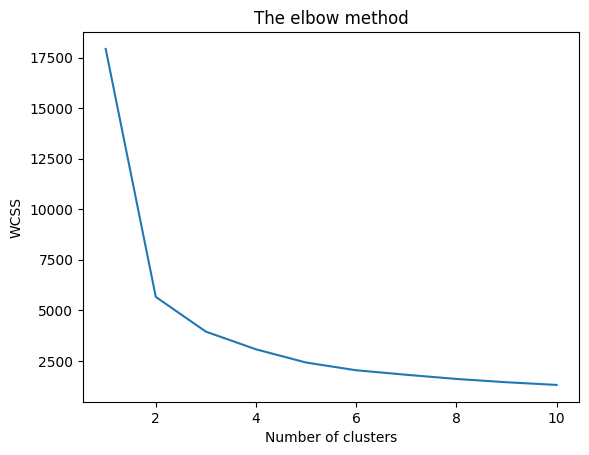

In [23]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [25]:
print(labels)

[2 0 2 1 2 1 2 2 2 2 2 2 0 2 0 0 2 2 1 2 0 0 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 0 2 0 1 0 1 2 1 2 2 1 0 0 0 0 0 0 1 0 2 0 0 2 1 0 2 0 2 0 0 2 2 0 2 0 0 2
 2 2 2 2 2 2 2 2 0 1 0 0 2 2 2 2 2 2 2 2 2 2 1 0 0 2 2 0 1 0 1 0 2 0 2 0 0
 1 2 2 0 0 2 2 2 2 1 0 0 2 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 0 2 2 0 2 2 1 2 0
 1 2 2 0 2 2 1 1 2 2 2 2 0 1 2 2 2 2 2 1 0 1 2 1 2 0 2 2 2 1 0 2 0 0 0 2 1
 1 2 2 2 2 0 2 2 2 1 1 2 2 2 1 1 2 2 2 1 1 2 1 1 1 2 2 1 2 2 0 2 0 0 2 0 1
 2 1 0 1 0 0 2 1 1 1 0 2 2 2 2 2 2 1 0 2 2 0 0 1 1 0 2 2 2 1 0 1 1 0 0 2 1
 2 1 2 0 2 2 0 2 2 2 2 0 2 2 2 0 0 1 1 2 2 0 2 2 0 0 0 0 0 1 2 1 2 0 0 2 2
 1 2 2 2 0 2 2 0 1 2 0 0 2 0 2 2 0 2 1 0 0 2 2 0 0 2 0 2 2 0 0 2 2 2 0 2 2
 2 2 2 2 2 0 1 2 2 0 1 1 0 1 0 2 0 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2
 2 2 0 0 2 2 2 1 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 1 2 0 2 1 2 2 2 2 1
 2 2 2 1 0 1 2 2 2 2 2 2 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2 1 2 2 2 0 2 0 0 1 2
 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 0 0 2 1 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 

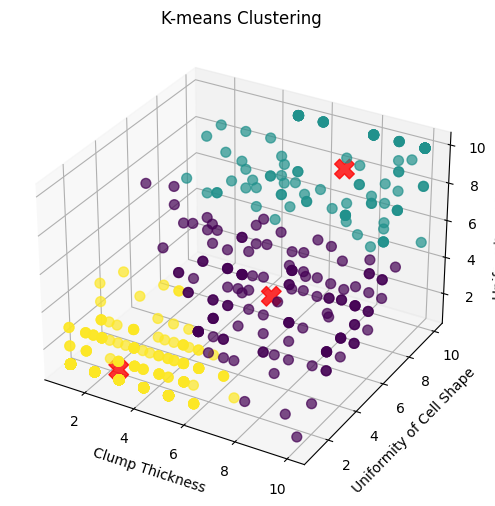

In [27]:
df['Cluster'] = labels

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Clump Thickness'], df['Uniformity of Cell Shape'], df['Uniformity of Cell Size'], c=labels, cmap='viridis', s=50, alpha=0.7)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8, marker='X')
ax.set_xlabel('Clump Thickness')
ax.set_ylabel('Uniformity of Cell Shape')
ax.set_zlabel('Uniformity of Cell Size')
ax.set_title('K-means Clustering')
plt.show()